In [73]:
import pandas as pd
import numpy as np
from scipy.stats import f as f_dist

In [74]:
factbook = pd.read_csv('../dataset/clean_data.csv')
factbook.head()

,Export (X1),Import (X2),Industrial production growth rate (X3),Investment (X4),Unemployment rate (X5),GDP (Y)
0,5.388000e+11,4.018000e+11,6.6,24.0,4.7,3.745000e+12
1,8.933000e+11,7.167000e+11,2.2,17.6,10.6,2.362000e+12
2,1.130000e+11,3.621000e+10,2.8,17.2,25.0,3.102000e+11
3,1.625000e+11,9.291000e+10,6.4,19.1,8.3,1.408000e+12
4,1.307000e+11,1.211000e+11,4.7,20.4,3.4,2.519000e+11


In [216]:
def stepwise(df, ci):
    print("----------------------------------------------------------------------------")
    print(" _____    ______    _____    ______   ___   __   ___   __    _____    _____ ")
    print("|  ___|  |_    _|  |  ___|  |      |  \  \ |  | /  /  |  |  |  ___|  |  ___|")
    print("|  |__     |  |    | |___   |   ___|   \  \|  |/  /   |  |  |  |__   | |___ ")
    print(" __   |    |  |    | |___   |  |        \        /    |  |   __   |  | |___ ")
    print("|_____|    |__|    |_____|  |__|         \__/\__/     |__|  |_____|  |_____|")
    print("----------------------------------------------------------------------------")
    print("Stepwise Regression")
    start = str(input("Type 'Start' to run stepwise package:"))
    print("--------------------------------------------------")

    if start.lower() == 'start':
        # Run forward stepwise
        good_model = {}
        columns = list(df.columns[:-1])
        target = df.columns[-1]
        k = len(df.columns[[-1, 0]])

        while len(columns) > 0:
            forward_list_jkr = {}
            iterasi_forward = len(good_model) + 1

            jkr_list = []
            for column in columns:
                x = np.column_stack((np.ones(len(df)), np.array(df[column])))
                
                if len(good_model) > 0:
                    for key in good_model.keys():
                        x_additional = np.array(df[key])
                        x = np.column_stack((x, x_additional))
                
                g = np.dot(np.transpose(x), np.array(df[target]))
                b = np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), g)
                jkr = (np.sum(np.dot(b, g)) - (sum(np.array(df[target]))**2/len(df)))
                jkr_list.append(jkr)
                jkr_now = jkr - sum(good_model.values())
                forward_list_jkr[column] = jkr_now

            print('forward stepwise')
            print()
            print(f"Iterasi ke-{iterasi_forward}")
            print()
            print("Jumlah Kuadrat Regresi")
            for key, value in forward_list_jkr.items():
                keys = list(good_model.keys())
                keys.append(key)
                if len(keys) > 1:
                    key_string = f"{'𝑅(𝛽_'}{key}{'|𝛽_'}{', '.join(keys[:-1])}{')'}"
                else:
                    key_string = f"{'𝑅(𝛽_'}{key}{')'}"
                print(f"{key_string}: {value}")
            
            print('Jumlah Kuadrat Total =', sum(np.array(df[target]) ** 2) - (sum(np.array(df[target])) ** 2 / len(df)))
            jkt = sum(np.array(df[target])**2) - (sum(np.array(df[target]))**2/len(df))
            max_jkr_column = max(forward_list_jkr, key=forward_list_jkr.get)
            s2 = (jkt - max(jkr_list)) / (len(df) - k)
            print('S2 =', s2)
            print(sum(good_model.values())+ forward_list_jkr[max_jkr_column])
            print('f_hitung =', forward_list_jkr[max_jkr_column] / s2)
            print('f_tabel =', f_dist.ppf(ci, 1, len(df) - k))
            check = (forward_list_jkr[max_jkr_column] / s2) > f_dist.ppf(ci, 1, len(df) - k)
            
            if check:
                # Add the significant predictor to the good_model
                print()
                print("atribut mempengaruhi model secara signifikan")
                good_model[max_jkr_column] = forward_list_jkr[max_jkr_column]
                print('model terbaik merupakan', list(good_model.keys()))
                print("--------------------------------------------------")
                columns.remove(max_jkr_column)
            else:
                print()
                print("--------------------------------------------------")
                print("atribut tidak mempengaruhi model secara signifikan")
                print("STOP!!!")
                print("--------------------------------------------------")
                break

            # Run backward stepwise
            if len(good_model) > 1:
                print("backward evaluation")
                print()
                backward_list_jkr = []
                print('cek dengan backward', list(good_model.keys())[:-1])

                #count jkr in best_model
                x = np.column_stack((np.ones(len(df)), np.array(df[list(good_model.keys())])))
                x1 = np.column_stack((np.ones(len(df)), np.array(df[list(good_model.keys())[-1]])))

                g = np.dot(np.transpose(x), np.array(df[target]))
                g1 = np.dot(np.transpose(x1), np.array(df[target]))
                b = np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), g)
                b1 = np.dot(np.linalg.inv(np.dot(np.transpose(x1), x1)), g1)

                jkr_old = (np.sum(np.dot(b1, g1))) - (sum(np.array(df[target]))**2/len(df))
                backward_list_jkr.append(jkr_old)

                jkr = (np.sum(np.dot(b, g)) - (sum(np.array(df[target]))**2/len(df))) - sum(backward_list_jkr)

                keys = list(good_model.keys())
                print(f"{'𝑅(𝛽_'}{keys[0]}{'|𝛽_'}{','.join(keys[1:])}{')'} =", jkr)

                print('s2 =', s2)
                print('f_hitung =', jkr / s2)
                print('f_table =', f_dist.ppf(ci, 1, len(df) - k))
                print()
                check = (jkr / s2) < f_dist.ppf(ci, 1, len(df) - k)
                
                if check:
                    print('atribut tidak mempengaruhi model secara signifikan')
                    keys_to_delete = list(good_model.keys())[:-1]
                    new_model = {k: v for k, v in good_model.items() if k not in keys_to_delete}
                    good_model = new_model
                    print(good_model)

                else:
                    print('atribut mempengaruhi model secara signifikan')


                print("--------------------------------------------------")

            k+=1
            
        print("Best Model adalah", list(good_model.keys()))
        return list(good_model.keys())
    
    else:
        print("Your Input Is Wrong, Please Enter 'Start' Then Try Again!!!")
        print("--------------------------------------------------")
        return stepwise(df, ci)

In [217]:
column = stepwise(factbook, 0.95)

----------------------------------------------------------------------------
 _____    ______    _____    ______   ___   __   ___   __    _____    _____ 
|  ___|  |_    _|  |  ___|  |      |  \  \ |  | /  /  |  |  |  ___|  |  ___|
|  |__     |  |    | |___   |   ___|   \  \|  |/  /   |  |  |  |__   | |___ 
 __   |    |  |    | |___   |  |        \        /    |  |   __   |  | |___ 
|_____|    |__|    |_____|  |__|         \__/\__/     |__|  |_____|  |_____|
----------------------------------------------------------------------------
Stepwise Regression
--------------------------------------------------
forward stepwise

Iterasi ke-1

Jumlah Kuadrat Regresi
𝑅(𝛽_Export (X1)): 1.2874266096632708e+26
𝑅(𝛽_Import (X2)): 1.7256397958323772e+26
𝑅(𝛽_Industrial production growth rate (X3)): 2.4349924976225847e+23
𝑅(𝛽_Investment (X4)): 6.95704935452421e+23
𝑅(𝛽_Unemployment rate (X5)): 5.233620874369248e+24
Jumlah Kuadrat Total = 2.1754422190583974e+26
S2 = 3.945635291456318e+23
1.7256397958323772

In [201]:
factbook[column].corr()

,Import (X2),Export (X1),Industrial production growth rate (X3)
Import (X2),1.000000,0.922810,-0.073898
Export (X1),0.922810,1.000000,-0.075232
Industrial production growth rate (X3),-0.073898,-0.075232,1.000000


In [191]:
def R2(df, column):
    x = np.column_stack((np.ones(len(df)), np.array(df[column])))
    g = np.dot(np.transpose(x), np.array(df[df.columns[-1]]))
    b = np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), g)
    jkr = (np.sum(np.dot(b, g)) - (sum(np.array(df[df.columns[-1]]))**2/len(df)))
    jkt = sum(np.array(df[df.columns[-1]])**2) - (sum(np.array(df[df.columns[-1]]))**2/len(df))

    return jkr/jkt

R2(factbook, column)

0.8213010190028985

In [215]:
def beta(df, column):
    beta_values = []
    x = np.column_stack((np.ones(len(df)), np.array(df[column])))
    b = np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.dot(np.transpose(x), np.array(df[df.columns[-1]])))
    beta_values.append(b)

    equation = f'𝒀 = {beta_values[0][0]:.2e} + {beta_values[0][1]:.2f}𝒙_𝟏 + {beta_values[0][2]:.2f}𝒙_2 + {beta_values[0][3]:.2e}𝒙_3'

    return equation

beta(factbook, column)


'𝒀 = -1.46e+11 + 9.51𝒙_𝟏 + -3.24𝒙_2 + 2.38e+10𝒙_3'

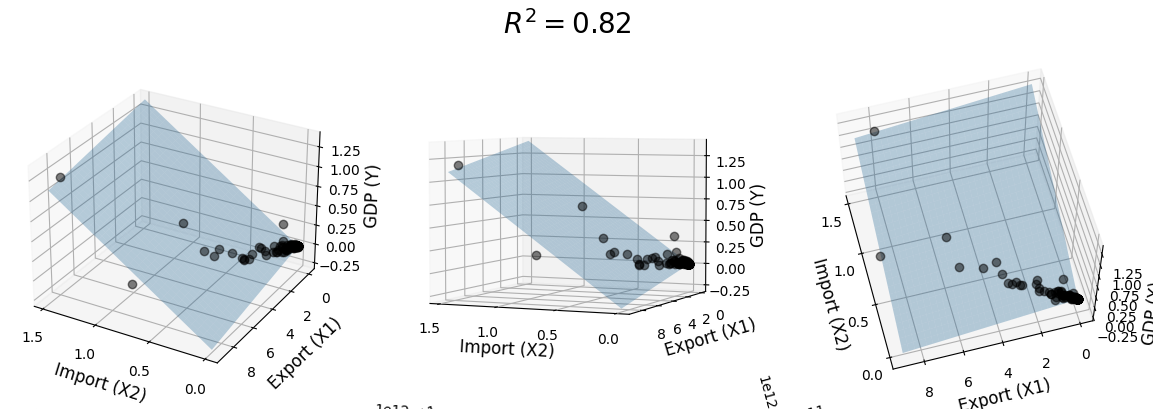

In [185]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

X = factbook[['Import (X2)', 'Export (X1)', 'Industrial production growth rate (X3)']].values
Y = factbook['GDP (Y)'].values

# Prepare model data point for visualization
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(min(x), max(x), 30)  # range of Import (X2) values
y_pred = np.linspace(min(y), max(y), 30)  # range of Export (X1) values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten(), np.ones_like(xx_pred.flatten())]).T

# Train the model
ols = linear_model.LinearRegression()
model = ols.fit(X[:, :2], Y)  # Use only the first two columns of X for training
predicted = model.predict(model_viz[:, :2])  # Use only the first two columns of model_viz for prediction

# Evaluate the model
r2 = R2(factbook, column)  # Use only the first two columns of X for evaluation

# Plot
plt.style.use('default')
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot_surface(xx_pred, yy_pred, predicted.reshape(xx_pred.shape), alpha=0.3)
    ax.set_xlabel('Import (X2)', fontsize=12)
    ax.set_ylabel('Export (X1)', fontsize=12)
    ax.set_zlabel('GDP (Y)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='y')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
plt.show()
